<a href="https://colab.research.google.com/github/praveenkumarbalakrishnan/tasks/blob/main/SIG731_Data_Wrangling_Task4P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Task 4P: SIG731-Data Wrangling

**Name:** Praveenkumar Balakrishnan

**Student Number:** 223029369

**Email Address:** s223029369@deakin.edu.au

# Import Statements

In [136]:
import pandas as pd
import numpy as np

from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Tasks

Uploaded the "nycflights13_weather.csv.gz" file in the input directory

It gives the hourly meteorological data for three airports in New York: LGA, JFK, and EWR for the whole year of 2013.

Columns are:

• origin – weather station: LGA, JFK, or EWR

• year, month, day, hour – time of recording

• temp, dewp – temperature and dewpoint in degrees Fahrenheit

• humid – relative humidity

• wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in mph)

• precip – precipitation, in inches

• pressure – sea level pressure in millibars

• visib – visibility in miles

• time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYY-mm-dd HH:MM:SS (actually, YYYY-mm-dd HH:00:00). However, due to a bugin the dataset, the data are shifted by 1 hour.

**Task 1**

Convert all columns so that they use metric (International System of Units, SI) or derived units: temp and dewp to Celsius, precip to millimetres, visib to kilometres, as well as wind_speed and wind_gust to km/h. Replace the data in-place (overwrite existing columns with new ones).

In [137]:
nycflights13_df = pd.read_csv("/content/drive/MyDrive/Inputs/nycflights13_weather.csv.gz", comment='#')
nycflights13_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


Used lambda function to convert and overwrite the columns to International System of Units

The below are the formulas used for conversion:

$Fahrenheit to Celsius: (F − 32) × 5/9$

$Inches to Millimetres: I * 25.4$

$Miles to kilometres: M * 1.609344$


In [138]:
for col in ['temp', 'dewp']:
  nycflights13_df[col] = nycflights13_df[col].apply(lambda x: (x - 32) * 5/9)

nycflights13_df['precip'] = nycflights13_df['precip'].apply(lambda x: x * 25.4)

for col in ['visib', 'wind_speed', 'wind_gust']:
  nycflights13_df[col] = nycflights13_df[col].apply(
      lambda x: x * 1.609344)
  
nycflights13_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.668008,19.181210,0.0,1013.9,16.09344,2013-01-01 01:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.224011,25.574947,0.0,1013.0,16.09344,2013-01-01 02:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.372010,23.443701,0.0,1012.6,16.09344,2013-01-01 03:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.224011,25.574947,0.0,1012.7,16.09344,2013-01-01 04:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.076012,27.706193,0.0,1012.8,16.09344,2013-01-01 05:00:00


**Task 2**

Convert the time_hour column (in-place) to the datetime64 type and then subtract one hour so that data match the information stored in the month, day, and hour fields.

In [139]:
nycflights13_df['time_hour'] = pd.to_datetime(nycflights13_df['time_hour'])
nycflights13_df['time_hour'] = (
    nycflights13_df['time_hour'] - np.timedelta64(1, 'h'))
nycflights13_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,16.668008,19.181210,0.0,1013.9,16.09344,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,22.224011,25.574947,0.0,1013.0,16.09344,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,20.372010,23.443701,0.0,1012.6,16.09344,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,22.224011,25.574947,0.0,1012.7,16.09344,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,24.076012,27.706193,0.0,1012.8,16.09344,2013-01-01 04:00:00


**Task 3**

Compute daily mean temperatures (360+ average temperatures for each day separately) for the JFK airport with missing hourly temperature measurements ignored (removed) whatsoever (e.g.,mean of [10, NaN, 20] is simply 15).

Added date column with only year, month and day, then filtered the JFK airport and computed the mean of temperature by the generated date column and resetted the index to generate as dataframe.

**Note:** skipna param for DataFrame.mean function is true by default which will ignore the missing hourly temperature measurements

In [140]:
nycflights13_df['date'] =  nycflights13_df['time_hour'].dt.strftime('%Y-%m-%d')
jfk_daily_temp_mean_df = nycflights13_df[nycflights13_df['origin'] == 'JFK'].groupby(
    ['date'])['temp'].mean().reset_index()
jfk_daily_temp_mean_df

,date,temp
0,2013-01-01,3.817391
1,2013-01-02,-1.920833
2,2013-01-03,-1.237500
3,2013-01-04,1.129167
4,2013-01-05,2.720833
...,...,...
359,2013-12-26,0.383333
360,2013-12-27,2.220833
361,2013-12-28,4.966667
362,2013-12-29,6.533333


**Task 4**

Present the daily mean temperatures (360+ data points) in a single plot. The x-axis labels should be human-readable and intuitive (e.g., month names).

Used pandas groupby method to generate mean of temperature for each day and converted the date column to datetime type

In [141]:
daily_temp_mean_df = nycflights13_df.groupby(
    ['date'])['temp'].mean().reset_index().sort_values('date')
daily_temp_mean_df['date'] = pd.to_datetime(daily_temp_mean_df['date'])
daily_temp_mean_df

,date,temp
0,2013-01-01,3.813043
1,2013-01-02,-1.833333
2,2013-01-03,-1.308333
3,2013-01-04,1.254167
4,2013-01-05,2.845833
...,...,...
359,2013-12-26,-0.054167
360,2013-12-27,1.866667
361,2013-12-28,4.988889
362,2013-12-29,6.600000


Plotted daily mean temperature using seaborn package and used month locator and formatter to keep the xaxis label in human readable format

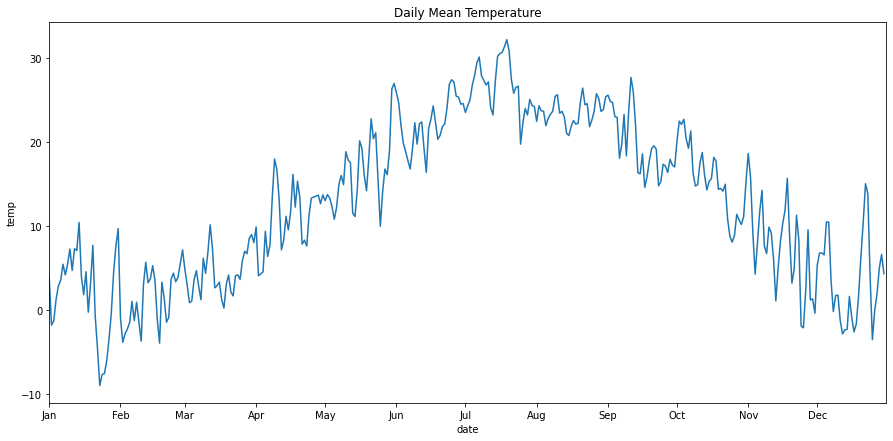

In [142]:
plt.figure(figsize=(15, 7))
plt.title('Daily Mean Temperature')
ax = sns.lineplot(data=daily_temp_mean_df, x='date', y='temp')
fmt = mdates.DateFormatter('%b')
month_inetrval = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(month_inetrval)
ax.xaxis.set_major_formatter(fmt)
plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2013-12-31'))
plt.show()

**Task 5**

Find the five hottest days

Determined the hottest day from daily mean temparature for all the given airports

In [143]:
print(
  'Five hottest days are ',
  daily_temp_mean_df.sort_values(
      'temp', ascending=False)['date'][:5].dt.strftime('%Y-%m-%d').to_list()
)

Five hottest days are  ['2013-07-19', '2013-07-18', '2013-07-20', '2013-07-17', '2013-07-16']


The below is to find five hottesst days by origin

In [144]:
origin_daily_temp_mean = nycflights13_df.groupby(
    ['origin', 'date'])['temp'].mean().reset_index()
grouped_top_5_temp_mean = origin_daily_temp_mean.groupby(
    'origin')['temp'].nlargest(5).reset_index()
origin_daily_temp_mean.iloc[grouped_top_5_temp_mean['level_1'], ]

,origin,date,temp
199,EWR,2013-07-19,32.870833
198,EWR,2013-07-18,31.954167
196,EWR,2013-07-16,30.879167
200,EWR,2013-07-20,30.879167
197,EWR,2013-07-17,30.862500
561,JFK,2013-07-17,30.579167
560,JFK,2013-07-16,30.483333
564,JFK,2013-07-20,30.245833
562,JFK,2013-07-18,30.241667
563,JFK,2013-07-19,30.187500


**Task 6**

Compute the daily mean temperatures also for the EWR and LGA airports.

Computed daily mean tempearture for all the airports and sliced the data for EWR and LGA

In [145]:
origin_daily_temp_mean = nycflights13_df.groupby(
    ['origin', 'date'])['temp'].mean().reset_index()
origin_daily_temp_mean

,origin,date,temp
0,EWR,2013-01-01,3.600000
1,EWR,2013-01-02,-1.758333
2,EWR,2013-01-03,-1.412500
3,EWR,2013-01-04,0.820833
4,EWR,2013-01-05,2.629167
...,...,...,...
1087,LGA,2013-12-26,-0.016667
1088,LGA,2013-12-27,2.133333
1089,LGA,2013-12-28,6.025000
1090,LGA,2013-12-29,7.129167


In [146]:
origin_daily_temp_mean[origin_daily_temp_mean['origin'] == 'EWR']

,origin,date,temp
0,EWR,2013-01-01,3.600000
1,EWR,2013-01-02,-1.758333
2,EWR,2013-01-03,-1.412500
3,EWR,2013-01-04,0.820833
4,EWR,2013-01-05,2.629167
...,...,...,...
359,EWR,2013-12-26,-0.529167
360,EWR,2013-12-27,1.245833
361,EWR,2013-12-28,3.975000
362,EWR,2013-12-29,6.137500


In [147]:
origin_daily_temp_mean[origin_daily_temp_mean['origin'] == 'LGA']

,origin,date,temp
728,LGA,2013-01-01,4.021739
729,LGA,2013-01-02,-1.820833
730,LGA,2013-01-03,-1.275000
731,LGA,2013-01-04,1.812500
732,LGA,2013-01-05,3.187500
...,...,...,...
1087,LGA,2013-12-26,-0.016667
1088,LGA,2013-12-27,2.133333
1089,LGA,2013-12-28,6.025000
1090,LGA,2013-12-29,7.129167


**Task 7**

Draw the daily mean temperatures for the 3 airports in the same plot (three curves of different colours). Add a readable legend.

Plotted daily mean temperature for the 3 airports using seaborn package and used month locator and formatter to keep the xaxis label in human readable format

In [148]:
# To convert date column to datetime to format the dates in the plot
origin_daily_temp_mean['date'] = pd.to_datetime(origin_daily_temp_mean['date'])

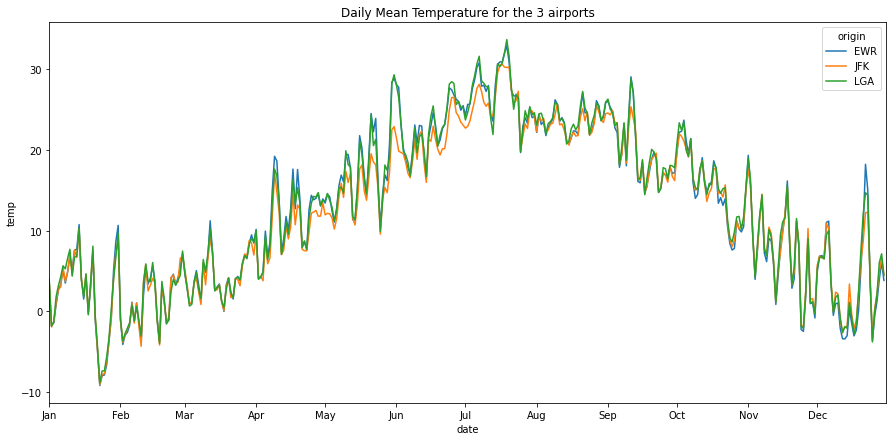

In [149]:
plt.figure(figsize=(15, 7))
plt.title('Daily Mean Temperature for the 3 airports')
ax = sns.lineplot(data=origin_daily_temp_mean, x='date', y='temp', hue='origin')
fmt = mdates.DateFormatter('%b')
month_inetrval = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(month_inetrval)
ax.xaxis.set_major_formatter(fmt)
plt.xlim(pd.to_datetime('2013-01-01'), pd.to_datetime('2013-12-31'))
plt.show()